# Aula 1
---

Nesta aula iremos realizar os seguintes passos do projeto de um EDA.

- Importar a base csv;
- Ver o formato das variáveis (describe);
- Transformações de variáveis (número para categóricas) – tanto como fazer esta transformação, como informar o software para ele entender a variável de determinada forma (as_data, as_srting). 
Por exemplo: Informar que tem variáveis de “data” 
- Criar variáveis novas, calculadas a partir de outras variáveis;
(fat/valor empréstimos);
fazer o cálculo de prazo (utilizando datas);
log(variáveis);
transformar variáveis do tipo categóricas em numérica; 
-  Selecionar variáveis (separar as quantitativas das categóricas) – criar sub-bases;
- Criar dummies; 
- Aprender alguns comandos para análise exploratória dos dados e visualização (hist., box plot, tabela de correlação, tabelas do tipo group by);
- Variáveis categóricas - aprender group by (com base em clientes inadimplentes – qual seria garantia, linha de fin, rating, etc).
- Aprender o If (selecionar variáveis com base numa regra – ex: somente empresas do privado + projetos e investimentos); 
- Usar if + group by; 
- Variáveis quantitativas – medidas centrais, variabilidade, quartis; 
- Testes de correlação (quanti x categórica e categórica x categórica).


In [1]:
# Importando a biblioteca pandas com o Alias pd
import pandas as pd

Como iremos, neste caso utilizar dados no formato CSV (Comma-separated values), devemos tomar alguns cuidados com esta base, pois a ocorrência de simbolos inadequados para este tipo de dados:

- ** ; ao ínves de , **
- ** , ao contrário de . para casas decimais podem ocasionar erros **

A formatação manual de um arquivo CSV, a partir de um editor de texto, muitas vezes pode ser mais eficiente do que a utilização de um programa muito complexo.

Uma boa referência para este tipo de dados:
https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/

Após as modificações realizadas nos dados originais e salvos no arquivo base_estudos.csv podemos iniciar nossas tarefas para a Análise Exploratória de Dados (EDA - Exploratory Data Analysis) as tarefas requisitadas.

Vamos criar uma matriz, ou DataFrame, nomenclatura utilizada pela bilioteca Pandas - Python para matrizes

In [2]:
# Read csv files from relative path
df = pd.read_csv('../DATABASE/base_estudos.csv')

Para visualizarmos se o dataframe está funcionando, ou seja, se os dados foram lidos corretamente usamos a função nativa do Ipython display(). O dataframe pode ser um arquivo muito grande, para evitar períodos muito longos com o load de certos documentos, utilizamos a função head() do pandas dataframe para imprimir as primeiras hipóteses do banco de dados ou tail() para imprimir as últimas.

In [3]:
display(df.head(n=5))

,id_produto,id_contrato,id_cliente,data_entrada,valor_fin,qtde_prest,juros_efet,data_entrada.1,data_final,provisao,...,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia
0,10707,30560012,212806,42349,151605.74,63.0,0.246781,42349,44607,0,...,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0
1,10707,30450012,212849,42367,133864.13,62.0,0.246802,42367,44607,0,...,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,219000.0
2,10707,31260012,212857,42349,156163.26,65.0,0.246774,42349,44669,45392,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,245000.0
3,10707,31540015,212903,42349,132834.93,67.0,0.246793,42349,44727,397,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,197000.0
4,10707,30570018,212911,42349,147130.53,63.0,0.246785,42349,44607,41467,...,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos,268000.0


In [4]:
display(df.tail(n=5))

,id_produto,id_contrato,id_cliente,data_entrada,valor_fin,qtde_prest,juros_efet,data_entrada.1,data_final,provisao,...,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia
2547,61000,66300002,1433237,43658,560763.83,120.0,0.478414,43658,47304,565069,...,SETOR PRIVADO,ADIMPLENTE,B,FUNGETUR,PI,RT,PRIV,FUNGETUR,Hipoteca 1º grau Imov Residencial,354000.00
2548,61000,80050000,2487080,43854,53194.04,120.0,1.242.562,43854,47490,159906,...,SETOR PRIVADO,ADIMPLENTE,C,FUNGETUR,PI,RT,PRIV,FUNGETUR,Alienação Fiduciaria Veículos,105292.20
2549,61018,58320008,683159,43312,4793407.28,60.0,0.414216,43312,45145,0,...,SETOR PRIVADO,ADIMPLENTE,AA,FUNGETUR,ME,RT,PRIV,FUNGETUR,Alienação Fiduciária Imóvel,37280000.00
2550,61018,58750002,727970,43515,182281.79,60.0,0.753472,43515,45327,550677,...,SETOR PRIVADO,ADIMPLENTE,C,FUNGETUR,ME,RT,PRIV,FUNGETUR,FDA,191773.14
2551,61018,76760006,2252112,43853,64000.00,60.0,0.585692,43853,45663,64141,...,SETOR PRIVADO,ADIMPLENTE,B,FUNGETUR,ME,RT,PRIV,FUNGETUR,FGI - Crédito Livre,51200.00


Para verificação de quais métodos podemos utilizar para os tipos de dados, junto ao Pandas, segue a página da API Pandas como referência principal:

https://pandas.pydata.org/docs/reference/index.html

Para descrevermos um dataframe com os tipos de variáveis, valores estatísticos, utilizamos os métodos:

In [5]:
display(df.describe(include='all'))

,id_produto,id_contrato,id_cliente,data_entrada,valor_fin,qtde_prest,juros_efet,data_entrada.1,data_final,provisao,...,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia,valor_garantia
count,2552.000000,2.552000e+03,2.552000e+03,2552.000000,2.552000e+03,2551.000000,2552,2552.000000,2552.000000,2.552000e+03,...,2552,2552,2552,2552,2552,2552,2552,2552,2552,2.537000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,2407,NaN,NaN,NaN,...,2,2,9,36,3,2,2,4,20,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0.407411,NaN,NaN,NaN,...,SETOR PRIVADO,ADIMPLENTE,B,CDP,CG,RT,PRIV,BNDES,FGI,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,...,2340,2514,755,1239,1689,1732,2340,1607,1257,NaN
mean,24229.802900,5.845925e+07,9.349917e+05,43245.815439,7.441381e+05,48.000000,NaN,43245.815439,44810.891850,2.877312e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.501178e+05
std,7818.714713,1.307111e+07,7.979411e+05,566.332012,2.223146e+06,24.700528,NaN,566.332012,654.513266,5.131532e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.019448e+06
min,10707.000000,5.720028e+06,2.480000e+02,41060.000000,8.085800e+02,1.000000,NaN,41060.000000,43692.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,21806.000000,4.992750e+07,3.581102e+05,43000.000000,5.461489e+04,34.000000,NaN,43000.000000,44392.000000,1.238425e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.243968e+04
50%,23701.000000,5.924000e+07,6.271120e+05,43383.000000,1.394400e+05,34.000000,NaN,43383.000000,44767.500000,5.444250e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.157296e+05
75%,23710.000000,6.873500e+07,1.305664e+06,43720.000000,3.215124e+05,60.000000,NaN,43720.000000,44910.000000,1.976340e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+05


Neste caso estamos inserindo todas as colunas do dataframe. Entretanto se há a necessidade de verificarmos as características de colunas qualitativas:

In [6]:
display(df.describe(include=['object']))

,juros_efet,rating_operacao,rating_cliente,ra,porte,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia
count,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552
unique,2407,8,7,16,6,2,2,9,36,3,2,2,4,20
top,0.407411,A,B,Região Metropolitana de São Paulo,PEQUENA,SETOR PRIVADO,ADIMPLENTE,B,CDP,CG,RT,PRIV,BNDES,FGI
freq,10,781,1070,988,1507,2340,2514,755,1239,1689,1732,2340,1607,1257


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html site para verificar a funcionalidade da função describe()

Ou se você quer utilizar o Pandas para verificar quais os tipos de colunas ou objeto nulo:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_produto       2552 non-null   int64  
 1   id_contrato      2552 non-null   int64  
 2   id_cliente       2552 non-null   int64  
 3   data_entrada     2552 non-null   int64  
 4   valor_fin        2552 non-null   float64
 5   qtde_prest       2551 non-null   float64
 6   juros_efet       2552 non-null   object 
 7   data_entrada.1   2552 non-null   int64  
 8   data_final       2552 non-null   int64  
 9   provisao         2552 non-null   int64  
 10  fat              2552 non-null   int64  
 11  rating_operacao  2552 non-null   object 
 12  rating_cliente   2552 non-null   object 
 13  ra               2552 non-null   object 
 14  porte            2552 non-null   object 
 15  setor            2552 non-null   object 
 16  situacao         2552 non-null   object 
 17  rating_atual  

Percebe-se que a coluna valor garantia possui 15 hipóteses nulas

In [8]:
df.dtypes

id_produto           int64
id_contrato          int64
id_cliente           int64
data_entrada         int64
valor_fin          float64
qtde_prest         float64
juros_efet          object
data_entrada.1       int64
data_final           int64
provisao             int64
fat                  int64
rating_operacao     object
rating_cliente      object
ra                  object
porte               object
setor               object
situacao            object
rating_atual        object
linha_fin           object
tipo_a              object
tipo_b              object
tipo_c              object
tipo_d              object
garantia            object
valor_garantia     float64
dtype: object

## Separando as colunas por variáveis qualitativas e quantitativas
---

In [9]:
df_qual = df.select_dtypes('object')

In [11]:
display(df_qual.head(n=5))

,juros_efet,rating_operacao,rating_cliente,ra,porte,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia
0,0.246781,AA,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
1,0.246802,AA,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
2,0.246774,A,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
3,0.246793,A,A,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
4,0.246785,A,A,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos


In [13]:
df_quant = df.select_dtypes(['float64','int64'])

In [14]:
display(df_quant.head(n=5))

,id_produto,id_contrato,id_cliente,data_entrada,valor_fin,qtde_prest,data_entrada.1,data_final,provisao,fat,valor_garantia
0,10707,30560012,212806,42349,151605.74,63.0,42349,44607,0,7481,245000.0
1,10707,30450012,212849,42367,133864.13,62.0,42367,44607,0,6482,219000.0
2,10707,31260012,212857,42349,156163.26,65.0,42349,44669,45392,960378,245000.0
3,10707,31540015,212903,42349,132834.93,67.0,42349,44727,397,1005795,197000.0
4,10707,30570018,212911,42349,147130.53,63.0,42349,44607,41467,813483,268000.0


Sendo assim temos os dois dataframes separados pro quantitativos e qualitativos

Uma boa prática é salvar estes novos dados, novamente no formato CSV:

In [15]:
df_quant.to_csv('../DATABASE/base_estudos_quantitativo.csv',index=False)
df_qual.to_csv('../DATABASE/base_estudos_qualitativo.csv',index=False)

Para criarmos as variáveis, ou novas colunas do dataframe utilizamos por exemplo:

In [16]:
df_quant['razao_faturamento'] = df['valor_fin']/df['fat']

/home/rsl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_quant.columns

Index(['id_produto', 'id_contrato', 'id_cliente', 'data_entrada', 'valor_fin',
       'qtde_prest', 'data_entrada.1', 'data_final', 'provisao', 'fat',
       'valor_garantia', 'razao_faturamento'],
      dtype='object')

E se quisermos, por exemplo, acessar a correlação entre as variáveis existentes:

In [27]:
import datetime as dt
df_quant['data_de_saida'] = pd.TimedeltaIndex(df_quant['data_final'], unit='d') + dt.datetime(1900,1,1)

/home/rsl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df_quant['data_de_entrada'] = pd.TimedeltaIndex(df_quant['data_entrada'], unit='d') + dt.datetime(1900,1,1)

/home/rsl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_quant

,id_produto,id_contrato,id_cliente,data_entrada,valor_fin,qtde_prest,data_entrada.1,data_final,provisao,fat,valor_garantia,razao_faturamento,data_de_entrada,data_de_saida
0,10707,30560012,212806,42349,151605.74,63.0,42349,44607,0,7481,245000.00,20.265438,2015-12-13,2022-02-17
1,10707,30450012,212849,42367,133864.13,62.0,42367,44607,0,6482,219000.00,20.651671,2015-12-31,2022-02-17
2,10707,31260012,212857,42349,156163.26,65.0,42349,44669,45392,960378,245000.00,0.162606,2015-12-13,2022-04-20
3,10707,31540015,212903,42349,132834.93,67.0,42349,44727,397,1005795,197000.00,0.132070,2015-12-13,2022-06-17
4,10707,30570018,212911,42349,147130.53,63.0,42349,44607,41467,813483,268000.00,0.180865,2015-12-13,2022-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,61000,66300002,1433237,43658,560763.83,120.0,43658,47304,565069,1,354000.00,560763.830000,2019-07-14,2029-07-07
2548,61000,80050000,2487080,43854,53194.04,120.0,43854,47490,159906,1,105292.20,53194.040000,2020-01-26,2030-01-09
2549,61018,58320008,683159,43312,4793407.28,60.0,43312,45145,0,814103582,37280000.00,0.005888,2018-08-02,2023-08-09
2550,61018,58750002,727970,43515,182281.79,60.0,43515,45327,550677,1,191773.14,182281.790000,2019-02-21,2024-02-07


In [30]:
df_quant.drop(['data_entrada', 'data_final', 'id_cliente',  'id_contrato', 'id_produto'], axis=1)

,valor_fin,qtde_prest,data_entrada.1,provisao,fat,valor_garantia,razao_faturamento,data_de_entrada,data_de_saida
0,151605.74,63.0,42349,0,7481,245000.00,20.265438,2015-12-13,2022-02-17
1,133864.13,62.0,42367,0,6482,219000.00,20.651671,2015-12-31,2022-02-17
2,156163.26,65.0,42349,45392,960378,245000.00,0.162606,2015-12-13,2022-04-20
3,132834.93,67.0,42349,397,1005795,197000.00,0.132070,2015-12-13,2022-06-17
4,147130.53,63.0,42349,41467,813483,268000.00,0.180865,2015-12-13,2022-02-17
...,...,...,...,...,...,...,...,...,...
2547,560763.83,120.0,43658,565069,1,354000.00,560763.830000,2019-07-14,2029-07-07
2548,53194.04,120.0,43854,159906,1,105292.20,53194.040000,2020-01-26,2030-01-09
2549,4793407.28,60.0,43312,0,814103582,37280000.00,0.005888,2018-08-02,2023-08-09
2550,182281.79,60.0,43515,550677,1,191773.14,182281.790000,2019-02-21,2024-02-07


In [31]:
df_quant.to_csv('../DATABASE/base_estudos_quantitativo.csv',index=False)

In [32]:
df_qual

,juros_efet,rating_operacao,rating_cliente,ra,porte,setor,situacao,rating_atual,linha_fin,tipo_a,tipo_b,tipo_c,tipo_d,garantia
0,0.246781,AA,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
1,0.246802,AA,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,AA,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
2,0.246774,A,B,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
3,0.246793,A,A,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
4,0.246785,A,A,RA de Santos,PF,SETOR PRIVADO,ADIMPLENTE,A,PRO CAMINHONEIRO,ME,RT,PRIV,BNDES,Alienação Fiduciaria Veículos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,0.478414,B,C,Região Metropolitana de São Paulo,MICRO,SETOR PRIVADO,ADIMPLENTE,B,FUNGETUR,PI,RT,PRIV,FUNGETUR,Hipoteca 1º grau Imov Residencial
2548,1.242.562,C,E,RA de Campinas,MICRO,SETOR PRIVADO,ADIMPLENTE,C,FUNGETUR,PI,RT,PRIV,FUNGETUR,Alienação Fiduciaria Veículos
2549,0.414216,A,A,RA de Campinas,MÉDIA,SETOR PRIVADO,ADIMPLENTE,AA,FUNGETUR,ME,RT,PRIV,FUNGETUR,Alienação Fiduciária Imóvel
2550,0.753472,C,D,Região Metropolitana de São Paulo,MICRO,SETOR PRIVADO,ADIMPLENTE,C,FUNGETUR,ME,RT,PRIV,FUNGETUR,FDA


---
# Challenge:

1) Realizar a trasformação de variável categórica para numérica:

In [34]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd">Encoding link for transform categorical data into numerical one</a>"""))

2) Visualizar os dados quantitativos com seaborn e matplotlib testando as diferenças

In [36]:

display(HTML("""<a href="https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e">Link para visualização de dados com Python</a>"""))

# Observações

    if variable == condition:
        # Do something
    elif variable == condition:
        # Do something
    else:
        # Do something


    for iterator in iterable:
        # Do something


    while iterator <operator> condition:
        # Do something


    List comprehension:
        lista_nova = [expressão for item in lista]
        
    Loop no dicionário:
        for key, value in dict.items():
            print(key, '->', value)


In [41]:
%%html
<iframe src="https://realpython.com/" width="800" height="300"></iframe>

---
## Desafio próxima aula

Fazer uma função Python em que:
     - entrada: dados crus csv
     - saida: dataframe qualitativo e quantitativo, mais o log das estatisticas obtidas

In [31]:
import seaborn as sns
import numpy as np

In [32]:
corr_matrix = df_quant.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

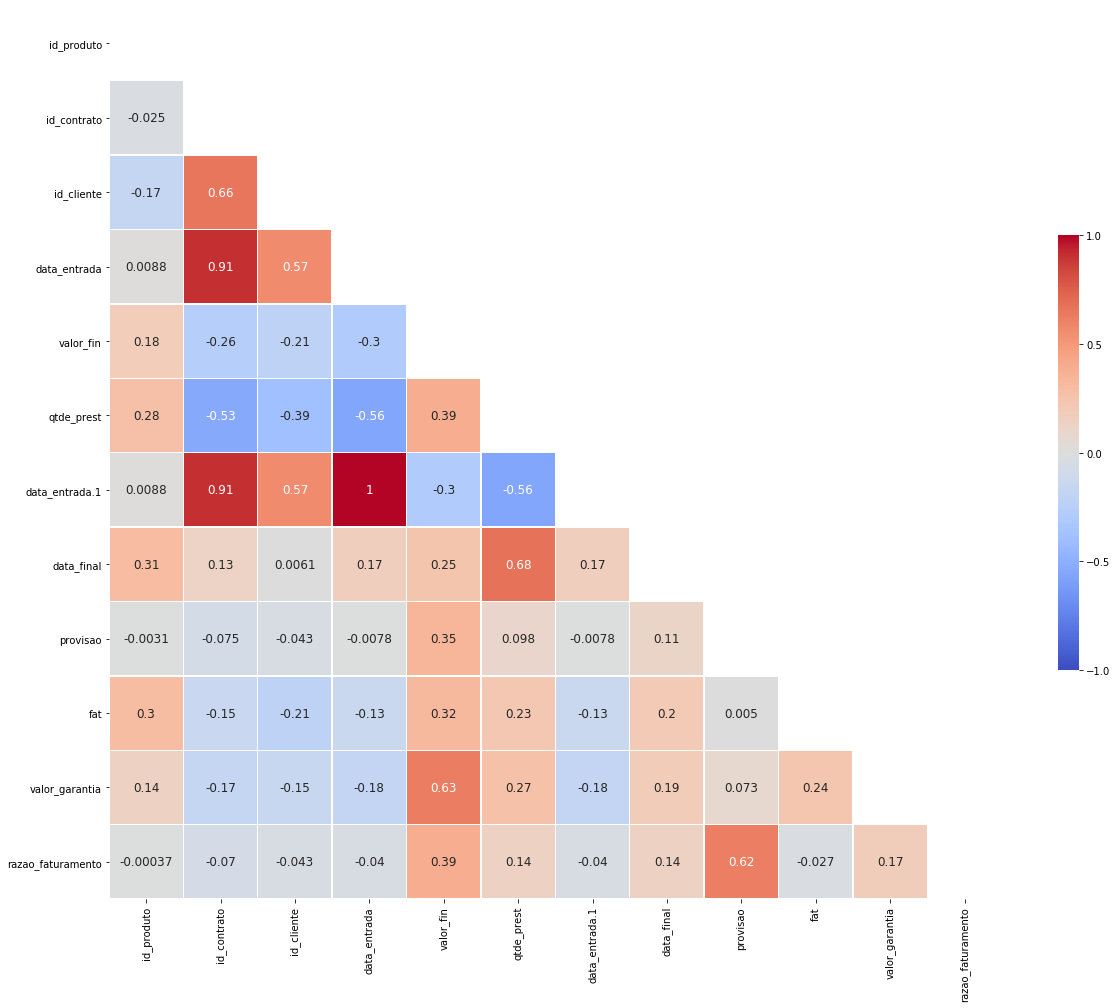

In [35]:
f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

---
# Desafio: